#Titanic Survival Prediction

##Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
import seaborn as sns

##Mounting Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Reading the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic/train.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic/test.csv')

In [ ]:
dataset2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


##Data Exploration

###Searching the available columns

In [ ]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
dataset2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

###Deleting the columns Name and Ticket

In [ ]:
dataset = dataset.drop(['Name', 'Ticket'], axis=1)
dataset2 = dataset2.drop(['Name', 'Ticket'], axis=1)

###Re-arranging columns

In [ ]:
columns_titles = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'Survived']
dataset=dataset.reindex(columns=columns_titles)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [ ]:
dataset.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
print(len(dataset["Fare"].unique()))
print(len(dataset["Cabin"].unique()))
#print(len(dataset["Ticket"].unique()))

248
148


##Dataset Preprocessing

In [ ]:
dataset["Cabin"] = dataset["Cabin"].notnull().astype("int")
dataset2["Cabin"] = dataset2["Cabin"].notnull().astype("int")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        891 non-null    int64  
 8   Embarked     889 non-null    object 
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [ ]:
dataset.Cabin.unique()

array([0, 1])

In [ ]:
dataset['Age'].fillna(int(dataset['Age'].mean()), inplace=True)
dataset['Fare'].fillna(int(dataset['Fare'].mean()), inplace=True)
dataset2['Age'].fillna(int(dataset2['Age'].mean()), inplace=True)
dataset2['Fare'].fillna(int(dataset2['Fare'].mean()), inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        891 non-null    int64  
 8   Embarked     889 non-null    object 
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Cabin        418 non-null    int64  
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Sex']= label_encoder.fit_transform(dataset['Sex'])
dataset['Embarked']= label_encoder.fit_transform(dataset['Embarked'])
dataset2['Sex']= label_encoder.fit_transform(dataset2['Sex'])
dataset2['Embarked']= label_encoder.fit_transform(dataset2['Embarked'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        891 non-null    int64  
 8   Embarked     891 non-null    int64  
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [ ]:
dataset.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,29.560236,0.523008,0.381594,32.204208,0.228956,1.538721,0.383838
std,257.353842,0.836071,0.477990,13.005010,1.102743,0.806057,49.693429,0.420397,0.794231,0.486592
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000
50%,446.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000,2.000000,0.000000
75%,668.500000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,2.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000,1.000000


In [ ]:
dataset.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
PassengerId,1.000000,-0.035144,0.042939,0.033632,-0.057527,-0.001652,0.012658,0.019919,0.013083,-0.005007
Pclass,-0.035144,1.000000,0.131900,-0.334974,0.083081,0.018443,-0.549500,-0.725541,0.157112,-0.338481
Sex,0.042939,0.131900,1.000000,0.082949,-0.114631,-0.245489,-0.182333,-0.140391,0.104057,-0.543351
Age,0.033632,-0.334974,0.082949,1.000000,-0.232978,-0.176486,0.093706,0.236162,-0.018937,-0.067814
SibSp,-0.057527,0.083081,-0.114631,-0.232978,1.000000,0.414838,0.159651,-0.040460,0.066654,-0.035322
Parch,-0.001652,0.018443,-0.245489,-0.176486,0.414838,1.000000,0.216225,0.036987,0.038322,0.081629
Fare,0.012658,-0.549500,-0.182333,0.093706,0.159651,0.216225,1.000000,0.482075,-0.221226,0.257307
Cabin,0.019919,-0.725541,-0.140391,0.236162,-0.040460,0.036987,0.482075,1.000000,-0.154457,0.316912
Embarked,0.013083,0.157112,0.104057,-0.018937,0.066654,0.038322,-0.221226,-0.154457,1.000000,-0.163517
Survived,-0.005007,-0.338481,-0.543351,-0.067814,-0.035322,0.081629,0.257307,0.316912,-0.163517,1.000000


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Cabin        418 non-null    int64  
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


##Data Visualization

<Axes: title={'center': 'Alive(1) vs Dead(0)'}, xlabel='Output class', ylabel='Count'>

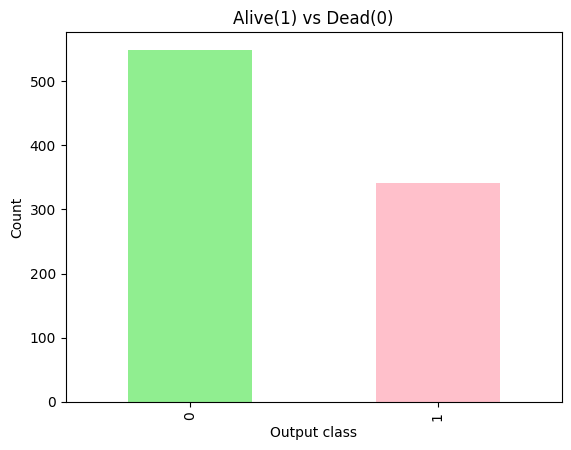

In [ ]:
dataset.Survived.value_counts().plot.bar(color=['lightgreen', 'pink'],title="Alive(1) vs Dead(0)", xlabel="Output class", ylabel = "Count")

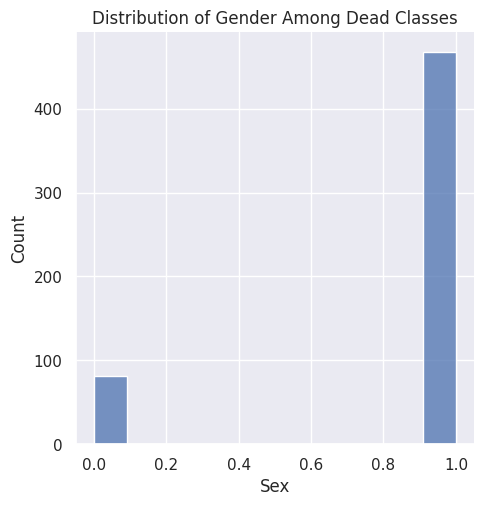

In [ ]:
temp = dataset.query('Survived == 0')
sns.set_theme()
sns.displot(data=temp.Sex).set(title="Distribution of Gender Among Dead Classes", xlabel="Sex")

In [ ]:
print(len(dataset.query('Survived == 0 and Sex == 0')))  #0 = Female
print(len(dataset.query('Survived == 0 and Sex == 1')))
print(len(dataset.query('Survived == 1 and Sex == 0')))
print(len(dataset.query('Survived == 1 and Sex == 1')))

81
468
233
109


##Feature Selection

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        891 non-null    int64  
 8   Embarked     891 non-null    int64  
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Cabin        418 non-null    int64  
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [ ]:
X_train = dataset.iloc[:, 1:9].values
y_train = dataset.iloc[:, 9].values

dataset3 = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic/gender_submission.csv')

X_test = dataset2.iloc[:, 1:].values
y_test = dataset3.iloc[:, 1].values

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(891, 8)
(891,)
(418, 8)
(418,)


##Training


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  0.9210526315789473
F1 score:  0.8945686900958467
Precision score:  0.8695652173913043
Recall score:  0.9210526315789473


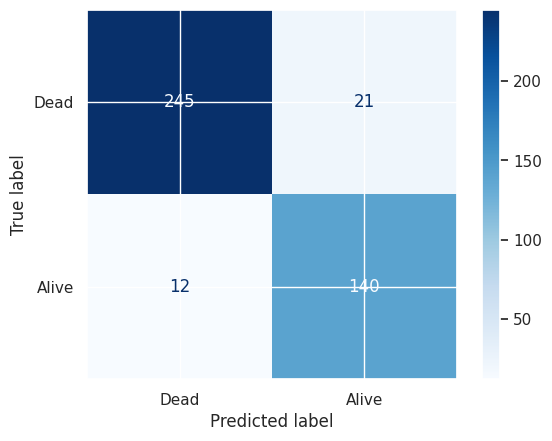

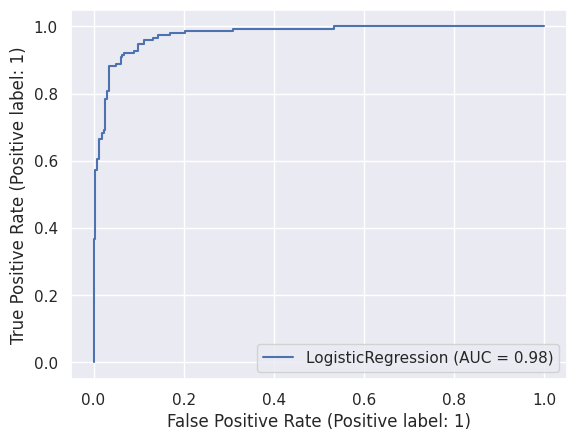

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.predict_proba(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Dead','Alive'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

Accuracy score:  0.9282296650717703
F1 score:  0.9019607843137255
Precision score:  0.8961038961038961
Recall score:  0.9078947368421053


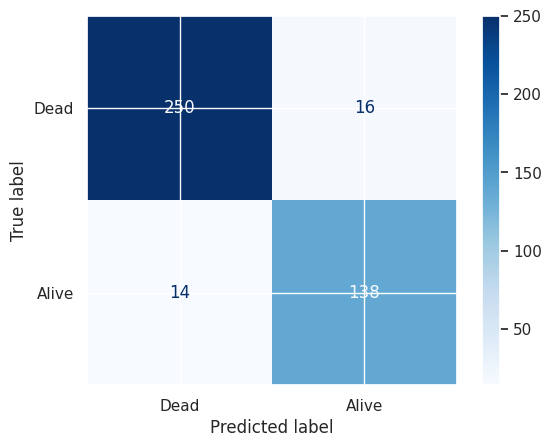

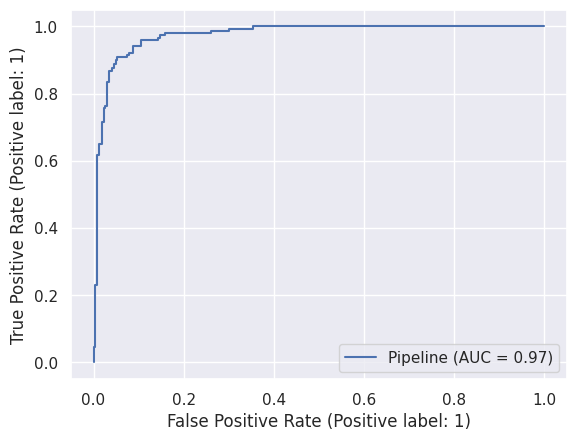

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
Y_pred= clf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Dead','Alive'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

Accuracy score:  0.7966507177033493
F1 score:  0.7318611987381703
Precision score:  0.703030303030303
Recall score:  0.7631578947368421


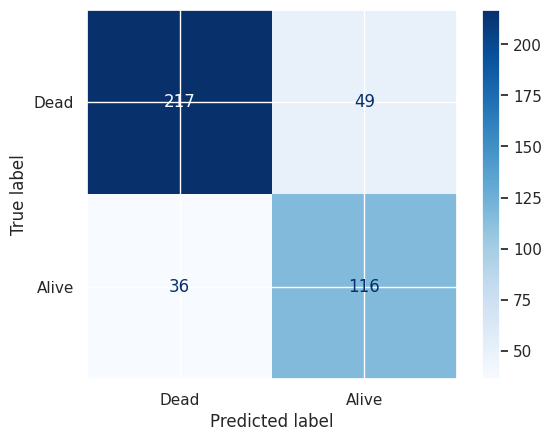

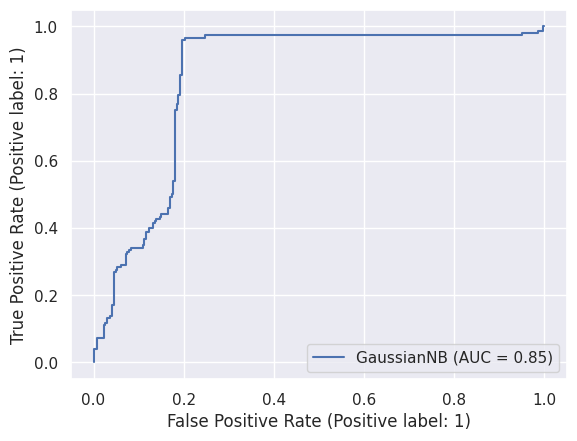

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Dead','Alive'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

Accuracy score:  0.638755980861244
F1 score:  0.4949832775919733
Precision score:  0.5034013605442177
Recall score:  0.4868421052631579


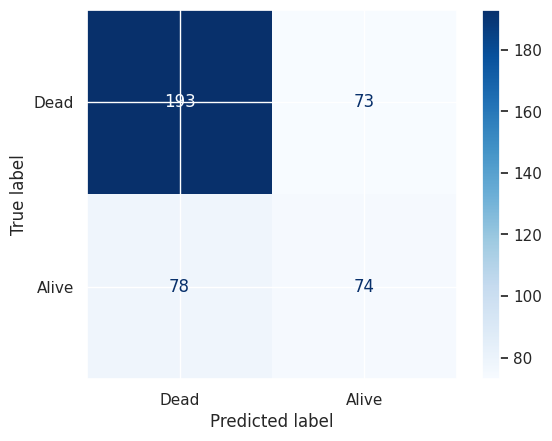

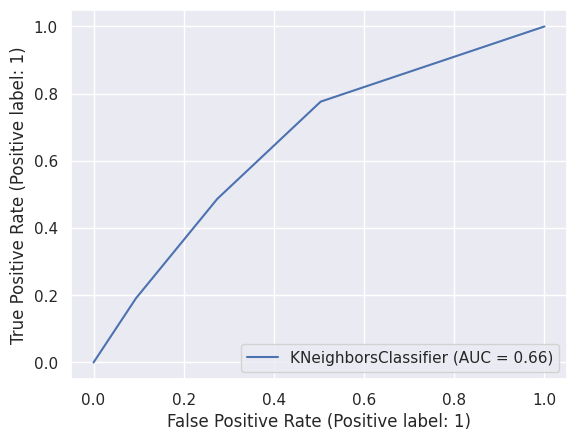

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
Y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Dead','Alive'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test)

Accuracy score:  0.7942583732057417
F1 score:  0.7171052631578947
Precision score:  0.7171052631578947
Recall score:  0.7171052631578947


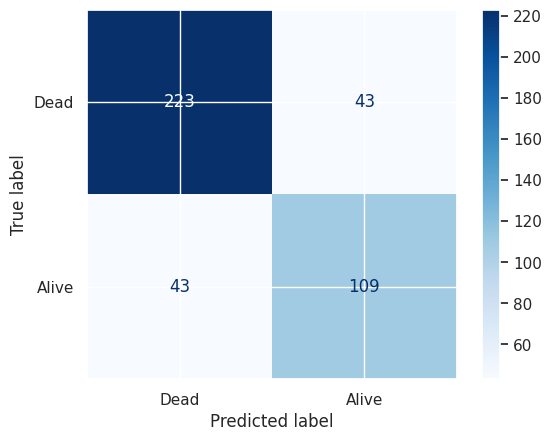

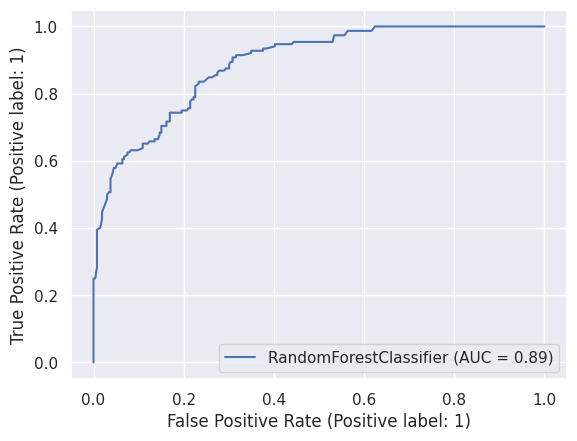

In [ ]:
rf = RandomForestClassifier(max_depth=20, random_state=0)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Dead','Alive'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

Accuracy score:  0.7607655502392344
F1 score:  0.6710526315789473
Precision score:  0.6710526315789473
Recall score:  0.6710526315789473


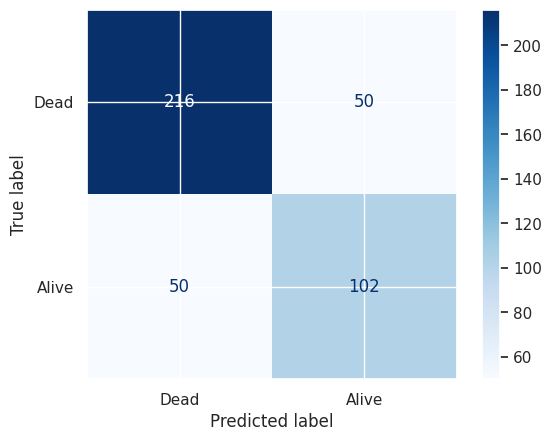

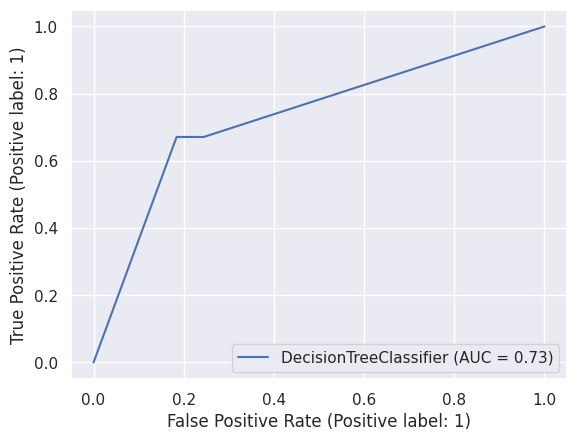

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Dead','Alive'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)